In [1]:
from numpy import savetxt
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COVID-19 USA/labeled_clustering demographic data.csv', header=None)
data = pd.read_csv('DSIDM labeled data.csv')
data = data.values

In [ ]:
np.random.shuffle(data)    # shuffle the data before splitting into training and testing

features = data[:, :16]
labels = data[:, 16]

x_train = features[:429794]
y_train = labels[:429794]
y_train = y_train.astype(int)

x_val = features[429794:483519]
y_val = labels[429794:483519]
y_val = y_val.astype(int)

x_test = features[483519:]
y_test = labels[483519:]
y_test = y_test.astype(int)

In [ ]:
print('\nx_train.shape ', x_train.shape, '\nx_val.shape ', x_val.shape, '\nx_test.shape ', x_test.shape)


x_train.shape  (429794, 16) 
x_val.shape  (53725, 16) 
x_test.shape  (53724, 16)


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(16,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(27, activation='softmax'))

In [ ]:
sgdm = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#network.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00010700076122254881),loss="categorical_crossentropy",metrics=["accuracy"])
es = EarlyStopping(monitor='val_accuracy', min_delta=1e-3, patience=15, verbose=1, mode='auto', restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
net = network.fit(x_train, y_train, epochs=500, batch_size=50, callbacks=[es, mc], validation_data=(x_val, y_val))

Epoch 1/500
8580/8596 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9875
Epoch 1: val_accuracy improved from -inf to 0.99989, saving model to best_model.h5
8596/8596 [==============================] - 36s 3ms/step - loss: 0.0503 - accuracy: 0.9875 - val_loss: 4.2005e-04 - val_accuracy: 0.9999
Epoch 2/500
8581/8596 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9992
Epoch 2: val_accuracy improved from 0.99989 to 1.00000, saving model to best_model.h5
8596/8596 [==============================] - 29s 3ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 6.6707e-05 - val_accuracy: 1.0000
Epoch 3/500
8584/8596 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994
Epoch 3: val_accuracy did not improve from 1.00000
8596/8596 [==============================] - 30s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 4.3826e-05 - val_accuracy: 1.0000
Epoch 4/500
8593/8596 [============================>.] - ETA: 0s - lo

In [ ]:
print(net.history.keys())
print('Training accuracy:', net.history['accuracy'])
print('Validation accuracy:', net.history['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Training accuracy: [0.9875451922416687, 0.9992066025733948, 0.9994066953659058, 0.9995067119598389, 0.9999883770942688, 0.9995858669281006, 0.9998231530189514, 0.9998441338539124, 1.0, 0.9996975064277649, 0.9998324513435364, 0.9998138546943665, 1.0, 0.9998208284378052, 1.0, 0.9998464584350586]
Validation accuracy: [0.9998883008956909, 1.0, 1.0, 0.9999069571495056, 1.0, 0.9998324513435364, 1.0, 1.0, 1.0, 1.0, 0.9999814033508301, 1.0, 1.0, 1.0, 1.0, 1.0]


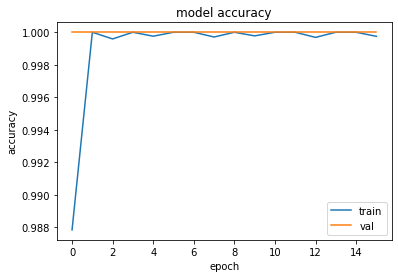

In [ ]:
#  Ploting the accuracy graph
plt.plot(net.history['accuracy'])
plt.plot(net.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

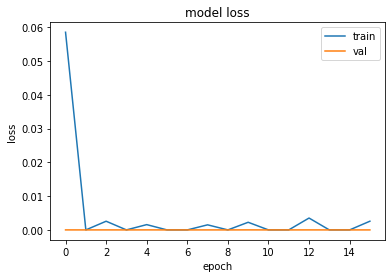

In [ ]:
#  Ploting the loss graph
plt.plot(net.history['loss'])
plt.plot(net.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
savetxt('DSID_val.csv', np.array(net.history['val_accuracy']), delimiter=',')

In [ ]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test loss:', test_loss, 'test accuracy', test_acc)

1679/1679 [==============================] - 3s 2ms/step - loss: 1.6482e-04 - accuracy: 0.9999
test loss: 0.00016482385399285704 test accuracy 0.9999441504478455


In [ ]:
prob = np.max(network.predict(x_test), axis=1)
savetxt('prob_DSID_test.csv', prob, delimiter=',')

1679/1679 [==============================] - 2s 1ms/step


In [14]:
dsidm = pd.read_csv('DSID_val.csv', header=None)
dsidm = dsidm.values
dsidm = dsidm[:,0]
simo = pd.read_csv('SIMO_val.csv', header=None)
simo = np.sum(simo.values, axis=1)/2

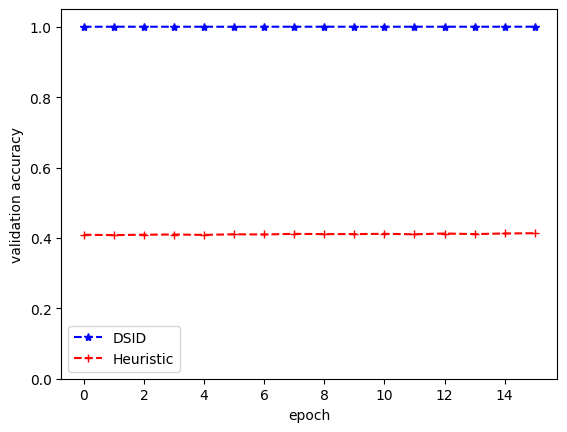

In [15]:
#  Ploting the accuracy graph
plt.plot(dsidm, c='b', marker='*', ls='--')
plt.plot(simo, c='r', marker='+', ls='--')
#plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['DSID', 'Heuristic'], loc='best')
plt.ylim(0,1.05)
#plt.show()
plt.savefig('val_acc.pdf', bbox_inches='tight')

In [16]:
dsidm = pd.read_csv('prob_DSID_test.csv', header=None)
dsidm = dsidm.values
simo = pd.read_csv('prob_SIMO_test.csv', header=None)
simo = simo.values

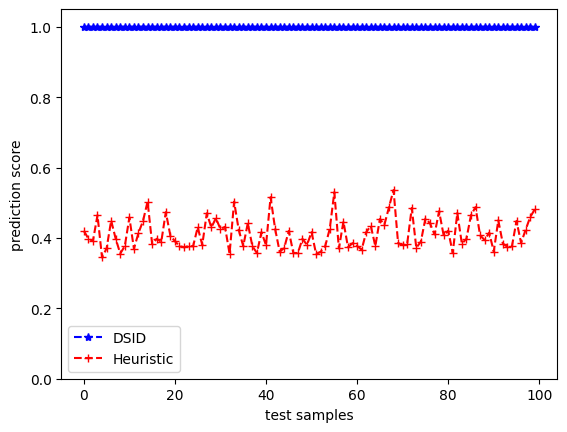

In [17]:
#  Ploting the accuracy graph
plt.plot(dsidm[:100], c='b', marker='*', ls='--')
plt.plot(simo[:100], c='r', marker='+', ls='--')
#plt.title('model validation accuracy')
plt.ylabel('prediction score')
plt.xlabel('test samples')
plt.legend(['DSID', 'Heuristic'], loc='best')
plt.ylim(0,1.05)
#plt.show()
plt.savefig('sub_pred score.pdf', bbox_inches='tight')

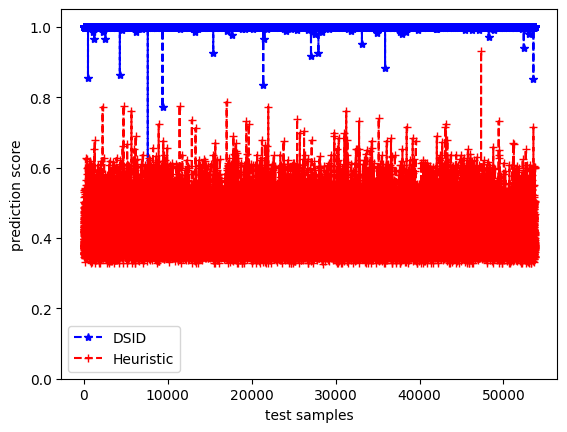

In [18]:
#  Ploting the accuracy graph
plt.plot(dsidm, c='b', marker='*', ls='--')
plt.plot(simo, c='r', marker='+', ls='--')
#plt.title('model validation accuracy')
plt.ylabel('prediction score')
plt.xlabel('test samples')
plt.legend(['DSID', 'Heuristic'], loc='best')
plt.ylim(0,1.05)
#plt.show()
plt.savefig('full_pred score.pdf', bbox_inches='tight')